In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
 # Step 1: Load and preprocess the data
data = pd.read_excel("D:\\projects\\project 1st oil price predection\\DCOILWTICO (1).xls")

In [3]:
data

,Date,Price
0,2012-04-02,105.25
1,2012-04-03,104.02
2,2012-04-04,101.53
3,2012-04-05,103.29
4,2012-04-06,NaN
...,...,...
2916,2023-06-06,71.71
2917,2023-06-07,72.52
2918,2023-06-08,71.28
2919,2023-06-09,70.16


In [4]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime
data = data.sort_values('Date')  # Sort the data by date in ascending order
data = data.set_index('Date')  # Set 'Date' as the index column

In [5]:
# Step 2: Handling missing values
data = data.fillna(method='ffill')  # Forward fill missing values

In [6]:
# Step 3: Handling negative values
data['Price'] = data['Price'].apply(lambda x: abs(x))  # Convert negative values to positive

In [7]:
# Step 4: Standardize the data
scaler = StandardScaler()
data['Price'] = scaler.fit_transform(data['Price'].values.reshape(-1, 1))

In [8]:
# Step 5: Split the dataset into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [12]:
# Step 6: Prepare the data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10  # Length of the input sequences
X_train = create_sequences(train_data['Price'], seq_length)
y_train = X_train[:, -1]
X_test = create_sequences(test_data['Price'], seq_length)
y_test = X_test[:, -1]

In [13]:
# Step 7: Build and train the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
73/73 [==============================] - 5s 9ms/step - loss: 0.0928
Epoch 2/50
73/73 [==============================] - 1s 10ms/step - loss: 0.0100
Epoch 3/50
73/73 [==============================] - 1s 10ms/step - loss: 0.0080
Epoch 4/50
73/73 [==============================] - 1s 9ms/step - loss: 0.0068
Epoch 5/50
73/73 [==============================] - 1s 9ms/step - loss: 0.0061
Epoch 6/50
73/73 [==============================] - 1s 10ms/step - loss: 0.0054
Epoch 7/50
73/73 [==============================] - 1s 9ms/step - loss: 0.0054
Epoch 8/50
73/73 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 9/50
73/73 [==============================] - 1s 9ms/step - loss: 0.0042
Epoch 10/50
73/73 [==============================] - 1s 9ms/step - loss: 0.0039
Epoch 11/50
73/73 [==============================] - 1s 10ms/step - loss: 0.0036
Epoch 12/50
73/73 [==============================] - 1s 10ms/step - loss: 0.0035
Epoch 13/50
73/73 [=========================

In [14]:
# Step 8: Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

18/18 [==============================] - 0s 6ms/step


In [15]:
# Step 9: Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

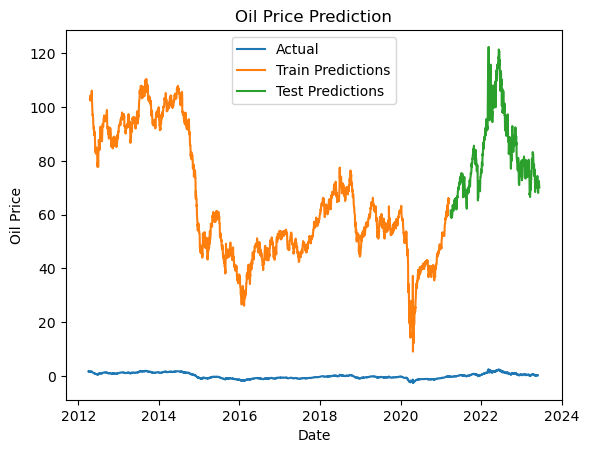

In [16]:
# Step 10: Plot the predicted values
plt.plot(data.index[:-seq_length], data['Price'][:-seq_length], label='Actual')
plt.plot(data.index[seq_length:train_size], train_predictions, label='Train Predictions')
plt.plot(data.index[train_size+seq_length:], test_predictions, label='Test Predictions')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Prediction')
plt.show()

In [18]:
# Step 11: Evaluate the model
train_rmse = np.sqrt(np.mean((train_predictions - y_train)**2))
test_rmse = np.sqrt(np.mean((test_predictions - y_test)**2))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 68.14482705396092
Test RMSE: 83.45653475093872


In [19]:
# Step 12: Perform future predictions
future_periods = 30  # Number of future periods to predict
future_inputs = create_sequences(data['Price'], seq_length)[-future_periods:]
future_predictions = model.predict(future_inputs)
future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 47ms/step


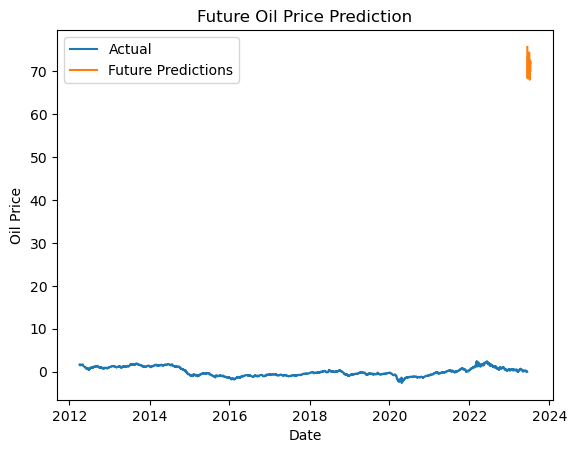

In [21]:
# Step 13: Plot future predictions
future_dates = pd.date_range(start=data.index[-1], periods=future_periods+1)[1:]
plt.plot(data.index, data['Price'], label='Actual')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Future Oil Price Prediction')
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Step 11: Evaluate the model
train_mape = mean_absolute_percentage_error(train_data['Price'][seq_length:], train_predictions)
test_mape = mean_absolute_percentage_error(test_data['Price'][seq_length:], test_predictions)

train_r2 = r2_score(train_data['Price'][seq_length:], train_predictions)
test_r2 = r2_score(test_data['Price'][seq_length:], test_predictions)

print(f'Train MAPE: {train_mape}')
print(f'Test MAPE: {test_mape}')

print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')


Train MAPE: 1698.245385549233
Test MAPE: 392.18204586672385
Train R^2: -4579.124644810709
Test R^2: -16551.682259303572
